In [3]:
%matplotlib inline

import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf

In [4]:
import pickle

def load_pickled_data(file, columns):
    
    with open(file, mode='rb') as f:
        dataset = pickle.load(f)
    return tuple(map(lambda c: dataset[c],columns))

In [5]:
from pandas.io.parsers import read_csv


signnames = pd.read_csv("/Users/eoinmurnaghan/Documents/dev/training/data/traffic-signs-master/signnames.csv").values[:, 1]
train_dataset_file = "/Users/eoinmurnaghan/Downloads/traffic-signs-data/train.p"
test_dataset_file = "/Users/eoinmurnaghan/Downloads/traffic-signs-data/test.p"
# train_balanced_dataset_file = "traffic-signs-data/train_balanced.p"

X_train, y_train = load_pickled_data(train_dataset_file, ['features', 'labels'])
X_test, y_test = load_pickled_data(test_dataset_file, ['features', 'labels'])

n_train = y_train.shape[0]
n_test = y_test.shape[0]
image_shape = X_train[0].shape
image_size = image_shape[0]
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
n_classes = class_counts.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Class 0: Speed limit (20km/h)                               180 samples


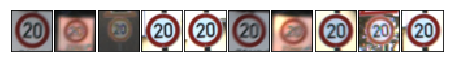

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                               1980 samples


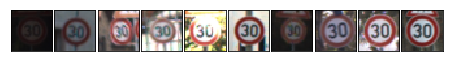

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                               2010 samples


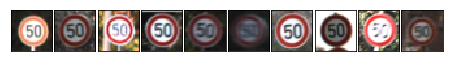

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                               1260 samples


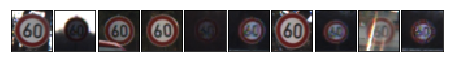

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                               1770 samples


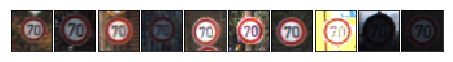

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                               1650 samples


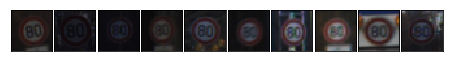

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                        360 samples


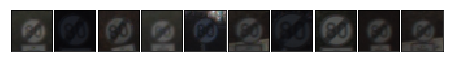

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                              1290 samples


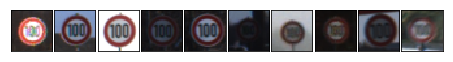

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                              1260 samples


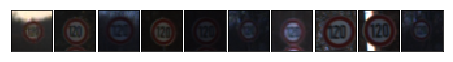

--------------------------------------------------------------------------------------

Class 9: No passing                                         1320 samples


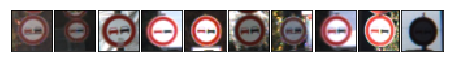

--------------------------------------------------------------------------------------

Class 10: No passing for vechiles over 3.5 metric tons       1800 samples


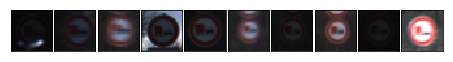

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection              1170 samples


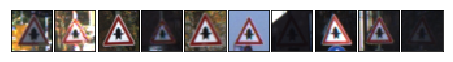

--------------------------------------------------------------------------------------

Class 12: Priority road                                      1890 samples


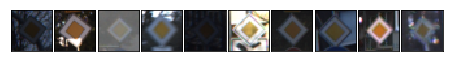

--------------------------------------------------------------------------------------

Class 13: Yield                                              1920 samples


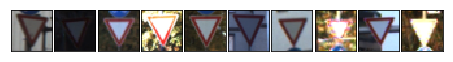

--------------------------------------------------------------------------------------

Class 14: Stop                                               690 samples


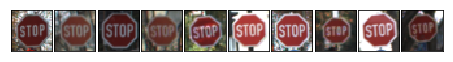

--------------------------------------------------------------------------------------

Class 15: No vechiles                                        540 samples


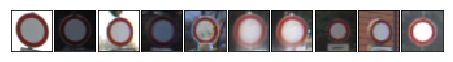

--------------------------------------------------------------------------------------

Class 16: Vechiles over 3.5 metric tons prohibited           360 samples


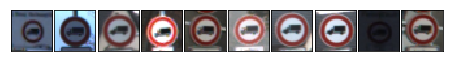

--------------------------------------------------------------------------------------

Class 17: No entry                                           990 samples


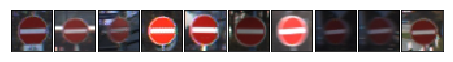

--------------------------------------------------------------------------------------

Class 18: General caution                                    1080 samples


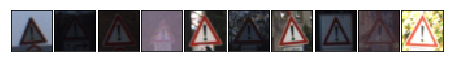

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                        180 samples


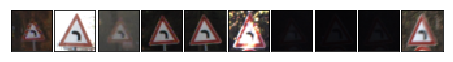

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                       300 samples


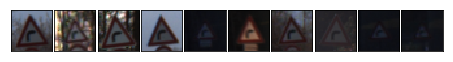

--------------------------------------------------------------------------------------

Class 21: Double curve                                       270 samples


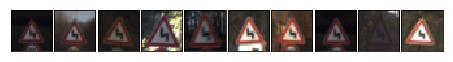

--------------------------------------------------------------------------------------

Class 22: Bumpy road                                         330 samples


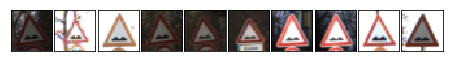

--------------------------------------------------------------------------------------

Class 23: Slippery road                                      450 samples


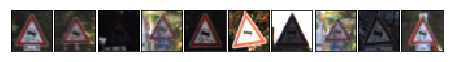

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right                          240 samples


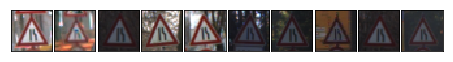

--------------------------------------------------------------------------------------

Class 25: Road work                                          1350 samples


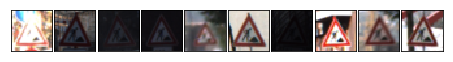

--------------------------------------------------------------------------------------

Class 26: Traffic signals                                    540 samples


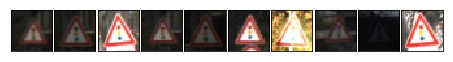

--------------------------------------------------------------------------------------

Class 27: Pedestrians                                        210 samples


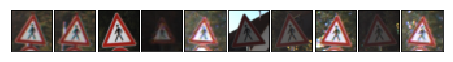

--------------------------------------------------------------------------------------

Class 28: Children crossing                                  480 samples


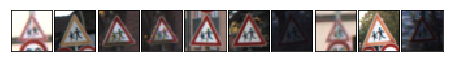

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                  240 samples


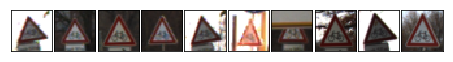

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                 390 samples


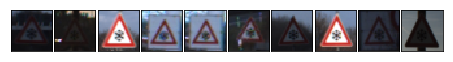

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing                              690 samples


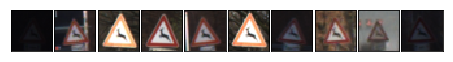

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                210 samples


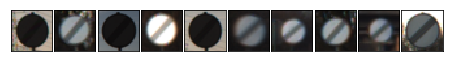

--------------------------------------------------------------------------------------

Class 33: Turn right ahead                                   599 samples


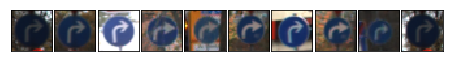

--------------------------------------------------------------------------------------

Class 34: Turn left ahead                                    360 samples


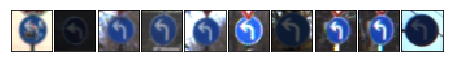

--------------------------------------------------------------------------------------

Class 35: Ahead only                                         1080 samples


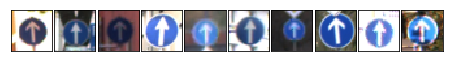

--------------------------------------------------------------------------------------

Class 36: Go straight or right                               330 samples


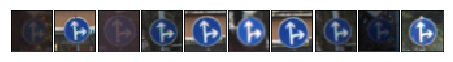

--------------------------------------------------------------------------------------

Class 37: Go straight or left                                180 samples


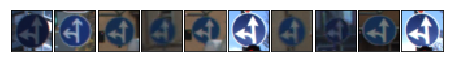

--------------------------------------------------------------------------------------

Class 38: Keep right                                         1860 samples


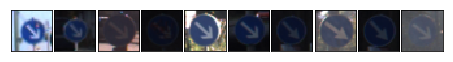

--------------------------------------------------------------------------------------

Class 39: Keep left                                          270 samples


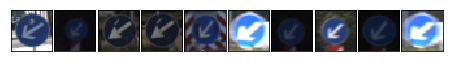

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                               300 samples


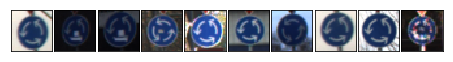

--------------------------------------------------------------------------------------

Class 41: End of no passing                                  210 samples


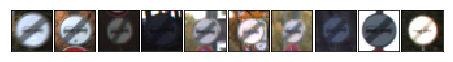

--------------------------------------------------------------------------------------

Class 42: End of no passing by vechiles over 3.5 metric tons 210 samples


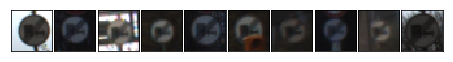

--------------------------------------------------------------------------------------



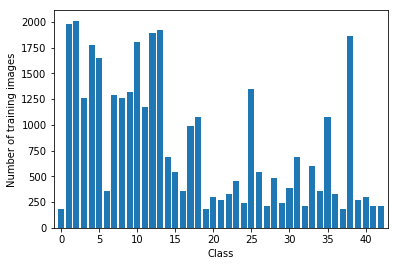

In [6]:
import random

col_width = max(len(name) for name in signnames)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print('Class %i: %-*s %s samples' % (c, col_width, signnames[c], str(c_count)))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print("--------------------------------------------------------------------------------------\n")
    
pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of training images')
pyplot.xlim([-1, 43])
pyplot.show()

In [7]:
import sys
import time

def get_time_hhmmss(star = None):
    if start is None:
        return time.strfttime("%Y/%m/%d %H:%M:%S")
    end = time.time()
    m, s = divmod(end - start, 60)
    h, m = divmod(m, 60)
    time_str = "%02d:%02d:%02d" % (h, m, s)
    return time_str

In [8]:
# print interations progress
def print_progress(iteration, total):
    
    str_format = "{0:.0f}"
    percents = str_format.format(100*(iteration / float(total)))
    filled_length = int(round(100 * iteration / float(total)))
    bar = '█' * filled_length + '-' * (100 - filled_length)

    sys.stdout.write('\r |%s| %s%%' % (bar, percents)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

In [9]:
# preprocessing routines

from sklearn.utils import shuffle
from skimage import exposure
import warnings

def preprocess_dataset(X, y = None):
    print("Preprocessing dataset with {} examples:".format(X.shape[0]))
    
#     Convert to grayscale
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
     
# scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
    
    for i in range(X.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            X[i] = exposure.equalise_adapthist(X[i])
        print_progress(i + 1, X.shape[0])
        
    if y is not None:
#         convert to one-hot encoding. convert back with y = y.nonzero()[1]
        y = np.eye(n_classes)[y]
        x, y = shuffle(X, y)
    
#     add single grayscale channel
    X = X.reshape(X.shape + (1,))
    return X, y

In [10]:
def class_name(one_hot):
    return signnames[one_hot.nonzero()[0][0]]

In [11]:
def load_and_process_data(pickled_data_file):
    
    X, y = load_pickled_data(pickled_data_file, columns = ['features', 'labels'])
    X, y = preprocess_dataset(X, y)
    
    return (X, y)

In [12]:
# data augmentation to bulk up dataset
from nolearn.lasagne import BatchIterator
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import random

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:

class AugmentedSignsBatchIterator(BatchIterator):
    
    def __init__(self, batch_size, shuffle = False, seed = 42, p = 0.5, intensity = 0.5):
        
        super(AugmentedSignsBatchIterator, self).__init__(batch_size, shuffle, seed)
        self.p = p
        self.intensity = intensity
    
#     function to apply randomised transformations to data
    def transform(self, Xb, yb):
        
        Xb, yb = super(AugmentedSignsBatchIterator, self).transform(
            Xb if yb is None else Xb.copy(),
            yb
        )
        
        if yb is not None:
            batch_size = Xb.shape[0]
            image_size = Xb.shape[1]
            
            Xb = self.rotate(Xb, batch_size)
            Xb = self.apply_projection_transform(Xb, batch_size, image_size)
        
        return Xb, yb
    
    def rotate(self, Xb, batch_size):
        
        for i in np.random.choice(batch_size, int(batch_size * self.p), replace = False):
            delta = 30. * self.intensity # scale by self.intensity
            Xb[i] = rotate(Xb[i], random.uniform(-delta, delta), mode = 'edge')
        return Xb 
    
    def apply_projection_transform(self, Xb, batch_size, image_size):
        
        d = image_size * 0.3 * self.intensity
        
        for i in np.random.choice(batch_size, int(batch_size * self.p), replace = False):        
            tl_top = random.uniform(-d, d)     # Top left corner, top margin
            tl_left = random.uniform(-d, d)    # Top left corner, left margin
            bl_bottom = random.uniform(-d, d)  # Bottom left corner, bottom margin
            bl_left = random.uniform(-d, d)    # Bottom left corner, left margin
            tr_top = random.uniform(-d, d)     # Top right corner, top margin
            tr_right = random.uniform(-d, d)   # Top right corner, right margin
            br_bottom = random.uniform(-d, d)  # Bottom right corner, bottom margin
            br_right = random.uniform(-d, d)   # Bottom right corner, right margin

            transform = ProjectiveTransform()
            transform.estimate(np.array((
                    (tl_left, tl_top),
                    (bl_left, image_size - bl_bottom),
                    (image_size - br_right, image_size - br_bottom),
                    (image_size - tr_right, tr_top)
                )), np.array((
                    (0, 0),
                    (0, image_size),
                    (image_size, image_size),
                    (image_size, 0)
                )))
            Xb[i] = warp(Xb[i], transform, output_shape=(image_size, image_size), order = 1, mode = 'edge')

        return Xb

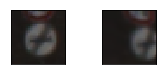

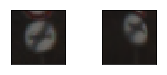

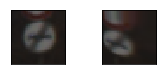

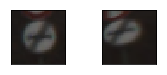

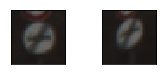

In [14]:
X_train, y_train = load_pickled_data(train_dataset_file, columns = ['features', 'labels'])
X_train = X_train / 255.

batch_iterator = AugmentedSignsBatchIterator(batch_size = 5, p = 1.0, intensity = 0.75)
for x_batch, y_batch in batch_iterator(X_train, y_train):
    for i in range(5): 
        # plot two images:
        fig = pyplot.figure(figsize=(3, 1))
        axis = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
        axis.imshow(X_train[i])
        axis = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
        axis.imshow(x_batch[i])
        pyplot.show()
    break

In [30]:
def flip_extend(X, y):
    
    self_flippable_horizontally = np.array([11, 12, 13, 14, 15, 16, 17, 18, 22, 26, 30, 35])
    
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    
    self_flippable_both = np.array([32, 40])
    
    cross_flippable = np.array([
        [19, 20],
        [33, 34],
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = 43
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    for c in range(num_classes):
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        
        if c in self_flippable_horizontally:
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
        
        if c in cross_flippable[:, 0]:
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
        
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        if c in self_flippable_vertically:
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
            
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        return (X_extended, y_extended)

In [31]:
def extend_balancing_classes(X, y, aug_intensity = 0.5, counts = None):
    num_classes = 43
    
    _, class_counts = np.unique(y, return_counts = True)
    max_c = max(class_counts)
    total = max_C + num_classes if counts is None else np.sum(counts)
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = np.float32)
    y_extended = np.empty([0], dtype = y.dtype)
    print("Extending dataset using augmented data (intensity = {}):".format(aug_intensity))
    
    for c, c_count in zip(range(num_classes), class_counts):
        # How many examples should there be eventually for this class:
        max_c = max_c if counts is None else counts[c]
        # First copy existing data for this class
        X_source = (X[y == c] / 255.).astype(np.float32)
        y_source = y[y == c]
        X_extended = np.append(X_extended, X_source, axis = 0)
        for i in range((max_c // c_count) - 1):
            batch_iterator = AugmentedSignsBatchIterator(batch_size = X_source.shape[0], p = 1.0, intensity = aug_intensity)
            
            for x_batch, _ in batch_iterator(X_source, y_source):
                X_extended = np.append(X_extended, x_batch, axis = 0)
                print_progress(X_extended.shape[0], total)
                
        batch_iterator = AugmentedSignsBatchIterator(batch_size = max_c % c_count, p = 1.0, intensity = aug_intensity)
        
        for x_batch, _ in batch_iterator(X_source, y_source):
            X_extended = np.append(X_extended, x_batch, axis = 0)
            print_progress(X_extended.shape[0], total)
            break
        # Fill labels for added images set to current class.
        added = X_extended.shape[0] - y_extended.shape[0]
        y_extended = np.append(y_extended, np.full((added), c, dtype = int))
        
        return ((X_extended * 255.).astype(np.uint8), y_extended)

In [32]:
from collections import namedtuple

Parameters = namedtuple('Parameters', [
        # Data parameters
        'num_classes', 'image_size', 
        # Training parameters
        'batch_size', 'max_epochs', 'log_epoch', 'print_epoch',
        # Optimisations
        'learning_rate_decay', 'learning_rate',
        'l2_reg_enabled', 'l2_lambda', 
        'early_stopping_enabled', 'early_stopping_patience', 
        'resume_training', 
        # Layers architecture
        'conv1_k', 'conv1_d', 'conv1_p', 
        'conv2_k', 'conv2_d', 'conv2_p', 
        'conv3_k', 'conv3_d', 'conv3_p', 
        'fc4_size', 'fc4_p'
    ])

In [33]:
import os

class Paths(object):
    
    def __init__(self, params):
        self.model_name = self.get_model_name(params)
        self.var_scope = self.get_variables_scope(params)
        self.root_path = os.getcwd() + "/models/" + self.model_name + "/"
        self.model_path = self.get_model_path()
        self.train_history_path = self.get_train_history_path()
        self.learning_curves_path = self.get_learning_curves_path()
        os.makedirs(self.root_path, exist_ok = True)

    def get_model_name(self, params):
        # We will encode model settings in its name: architecture, optimisations applied, etc.
        model_name = "k{}d{}p{}_k{}d{}p{}_k{}d{}p{}_fc{}p{}".format(
            params.conv1_k, params.conv1_d, params.conv1_p, 
            params.conv2_k, params.conv2_d, params.conv2_p, 
            params.conv3_k, params.conv3_d, params.conv3_p, 
            params.fc4_size, params.fc4_p
        )
        model_name += "_lrdec" if params.learning_rate_decay else "_no-lrdec"
        model_name += "_l2" if params.l2_reg_enabled else "_no-l2"
        return model_name

    def get_variables_scope(self, params):
        # We will encode model settings in its name: architecture, optimisations applied, etc.
        var_scope = "k{}d{}_k{}d{}_k{}d{}_fc{}_fc0".format(
            params.conv1_k, params.conv1_d,
            params.conv2_k, params.conv2_d,
            params.conv3_k, params.conv3_d, 
            params.fc4_size
        )
        return var_scope

    def get_model_path(self):
        return self.root_path + "model.ckpt"

    def get_train_history_path(self):
        return self.root_path + "train_history"
    
    def get_learning_curves_path(self):
        return self.root_path + "learning_curves.png"

In [34]:
class EarlyStopping(object):
    
    def __init__(self, saver, session, patience = 100, minimize = True):

        self.minimize = minimize
        self.patience = patience
        self.saver = saver
        self.session = session
        self.best_monitored_value = np.inf if minimize else 0.
        self.best_monitored_epoch = 0
        self.restore_path = None

    def __call__(self, value, epoch):

        if (self.minimize and value < self.best_monitored_value) or (not self.minimize and value > self.best_monitored_value):
            self.best_monitored_value = value
            self.best_monitored_epoch = epoch
            self.restore_path = self.saver.save(self.session, os.getcwd() + "/early_stopping_checkpoint")
        elif self.best_monitored_epoch + self.patience < epoch:
            if self.restore_path != None:
                self.saver.restore(self.session, self.restore_path)
            else:
                print("ERROR: Failed to restore session")
            return True
        
        return False

In [35]:
from cloudlog import CloudLog

class ModelCloudLog(CloudLog):
        
    def log_parameters(self, params, train_size, valid_size, test_size):

        if params.resume_training:
            self("=============================================")
            self("============= RESUMING TRAINING =============")
            self("=============================================")

        self("=================== DATA ====================")
        self("            Training set: {} examples".format(train_size))
        self("          Validation set: {} examples".format(valid_size))
        self("             Testing set: {} examples".format(test_size))
        self("              Batch size: {}".format(params.batch_size))   

        self("=================== MODEL ===================")
        self("--------------- ARCHITECTURE ----------------")  
        self(" %-*s %-*s %-*s %-*s" % (10, "", 10, "Type", 8, "Size", 15, "Dropout (keep p)"))    
        self(" %-*s %-*s %-*s %-*s" % (10, "Layer 1", 10, "{}x{} Conv".format(params.conv1_k, params.conv1_k), 8, str(params.conv1_d), 15, str(params.conv1_p)))    
        self(" %-*s %-*s %-*s %-*s" % (10, "Layer 2", 10, "{}x{} Conv".format(params.conv2_k, params.conv2_k), 8, str(params.conv2_d), 15, str(params.conv2_p)))    
        self(" %-*s %-*s %-*s %-*s" % (10, "Layer 3", 10, "{}x{} Conv".format(params.conv3_k, params.conv3_k), 8, str(params.conv3_d), 15, str(params.conv3_p)))    
        self(" %-*s %-*s %-*s %-*s" % (10, "Layer 4", 10, "FC", 8, str(params.fc4_size), 15, str(params.fc4_p)))    
        self("---------------- PARAMETERS -----------------")
        self("     Learning rate decay: " + ("Enabled" if params.learning_rate_decay else "Disabled (rate = {})".format(params.learning_rate)))
        self("       L2 Regularization: " + ("Enabled (lambda = {})".format(params.l2_lambda) if params.l2_reg_enabled else "Disabled"))
        self("          Early stopping: " + ("Enabled (patience = {})".format(params.early_stopping_patience) if params.early_stopping_enabled else "Disabled"))
        self(" Keep training old model: " + ("Enabled" if params.resume_training else "Disabled"))

In [36]:
def fully_connected(input, size):

    weights = tf.get_variable( 'weights', 
        shape = [input.get_shape()[1], size],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [size],
        initializer = tf.constant_initializer(0.0)
      )
    return tf.matmul(input, weights) + biases

def fully_connected_relu(input, size):
    return tf.nn.relu(fully_connected(input, size))

def conv_relu(input, kernel_size, depth):

    weights = tf.get_variable( 'weights', 
        shape = [kernel_size, kernel_size, input.get_shape()[3], depth],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [depth],
        initializer = tf.constant_initializer(0.0)
      )
    conv = tf.nn.conv2d(input, weights,
        strides = [1, 1, 1, 1], padding = 'SAME')
    return tf.nn.relu(conv + biases)

def pool(input, size):

    return tf.nn.max_pool(
        input, 
        ksize = [1, size, size, 1], 
        strides = [1, size, size, 1], 
        padding = 'SAME'
    )

def model_pass(input, params, is_training):

    # Convolutions

    with tf.variable_scope('conv1'):
        conv1 = conv_relu(input, kernel_size = params.conv1_k, depth = params.conv1_d) 
    with tf.variable_scope('pool1'): 
        pool1 = pool(conv1, size = 2)
        pool1 = tf.cond(is_training, lambda: tf.nn.dropout(pool1, keep_prob = params.conv1_p), lambda: pool1)
    with tf.variable_scope('conv2'):
        conv2 = conv_relu(pool1, kernel_size = params.conv2_k, depth = params.conv2_d)
    with tf.variable_scope('pool2'):
        pool2 = pool(conv2, size = 2)
        pool2 = tf.cond(is_training, lambda: tf.nn.dropout(pool2, keep_prob = params.conv2_p), lambda: pool2)
    with tf.variable_scope('conv3'):
        conv3 = conv_relu(pool2, kernel_size = params.conv3_k, depth = params.conv3_d)
    with tf.variable_scope('pool3'):
        pool3 = pool(conv3, size = 2)
        pool3 = tf.cond(is_training, lambda: tf.nn.dropout(pool3, keep_prob = params.conv3_p), lambda: pool3)
    
    # Fully connected
    
    # 1st stage output
    pool1 = pool(pool1, size = 4)
    shape = pool1.get_shape().as_list()
    pool1 = tf.reshape(pool1, [-1, shape[1] * shape[2] * shape[3]])
    
    # 2nd stage output
    pool2 = pool(pool2, size = 2)
    shape = pool2.get_shape().as_list()
    pool2 = tf.reshape(pool2, [-1, shape[1] * shape[2] * shape[3]])    
    
    # 3rd stage output
    shape = pool3.get_shape().as_list()
    pool3 = tf.reshape(pool3, [-1, shape[1] * shape[2] * shape[3]])
    
    flattened = tf.concat(1, [pool1, pool2, pool3])
    
    with tf.variable_scope('fc4'):
        fc4 = fully_connected_relu(flattened, size = params.fc4_size)
        fc4 = tf.cond(is_training, lambda: tf.nn.dropout(fc4, keep_prob = params.fc4_p), lambda: fc4)
    with tf.variable_scope('out'):
        logits = fully_connected(fc4, size = params.num_classes)
    return logits

In [37]:
def plot_curve(axis, params, train_column, valid_column, linewidth = 2, train_linestyle = "b-", valid_linestyle = "g-"):
    model_history = np.load(Paths(params).train_history_path + ".npz")
    train_values = model_history[train_column]
    valid_values = model_history[valid_column]
    epochs = train_values.shape[0]
    x_axis = np.arange(epochs)
    axis.plot(x_axis[train_values > 0], train_values[train_values > 0], train_linestyle, linewidth=linewidth, label="train")
    axis.plot(x_axis[valid_values > 0], valid_values[valid_values > 0], valid_linestyle, linewidth=linewidth, label="valid")
    return epochs

# Plots history of learning curves for a specific model.
def plot_learning_curves(params):
    curves_figure = pyplot.figure(figsize = (10, 4))
    axis = curves_figure.add_subplot(1, 2, 1)
    epochs_plotted = plot_curve(axis, parameters, train_column = "train_accuracy_history", valid_column = "valid_accuracy_history")

    pyplot.grid()
    pyplot.legend()
    pyplot.xlabel("epoch")
    pyplot.ylabel("accuracy")
    pyplot.ylim(50., 115.)
    pyplot.xlim(0, epochs_plotted)

    axis = curves_figure.add_subplot(1, 2, 2)
    epochs_plotted = plot_curve(axis, parameters, train_column = "train_loss_history", valid_column = "valid_loss_history")

    pyplot.grid()
    pyplot.legend()
    pyplot.xlabel("epoch")
    pyplot.ylabel("loss")
    pyplot.ylim(0.0001, 10.)
    pyplot.xlim(0, epochs_plotted)
    pyplot.yscale("log")

In [38]:
def train_model(params, X_train, y_train, X_valid, y_valid, X_test, y_test, logger_config):
    
    # Initialisation routines: generate variable scope, create logger, note start time.
    paths = Paths(params)
    log = ModelCloudLog(
        os.path.join(paths.root_path, "logs"), 
        dropbox_token=logger_config["dropbox_token"], 
        telegram_token=logger_config["telegram_token"], 
        telegram_chat_id=logger_config["telegram_chat_id"]
    )
    start = time.time()
    model_variable_scope = paths.var_scope

    log.log_parameters(params, y_train.shape[0], y_valid.shape[0], y_test.shape[0]) 
    
    # Build the graph
    graph = tf.Graph()
    with graph.as_default():
        # Input data. For the training data, we use a placeholder that will be fed at run time with a training minibatch.
        tf_x_batch = tf.placeholder(tf.float32, shape = (None, params.image_size[0], params.image_size[1], 1))
        tf_y_batch = tf.placeholder(tf.float32, shape = (None, params.num_classes))
        is_training = tf.placeholder(tf.bool)
        current_epoch = tf.Variable(0, trainable=False)  # count the number of epochs

        # Model parameters.
        if params.learning_rate_decay:
            learning_rate = tf.train.exponential_decay(params.learning_rate, current_epoch, decay_steps = params.max_epochs, decay_rate = 0.01)
        else:
            learning_rate = params.learning_rate
            
        # Training computation.
        with tf.variable_scope(model_variable_scope):
            logits = model_pass(tf_x_batch, params, is_training)
            if params.l2_reg_enabled:
                with tf.variable_scope('fc4', reuse = True):
                    l2_loss = tf.nn.l2_loss(tf.get_variable('weights'))
            else:
                l2_loss = 0

        predictions = tf.nn.softmax(logits)
        softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, tf_y_batch)
        loss = tf.reduce_mean(softmax_cross_entropy) + params.l2_lambda * l2_loss  

        # Optimizer.
        optimizer = tf.train.AdamOptimizer(
            learning_rate = learning_rate
        ).minimize(loss)

    with tf.Session(graph = graph) as session:
        session.run(tf.global_variables_initializer())

        # A routine for evaluating current model parameters
        def get_accuracy_and_loss_in_batches(X, y):
            p = []
            sce = []
            batch_iterator = BatchIterator(batch_size = 128)
            for x_batch, y_batch in batch_iterator(X, y):
                [p_batch, sce_batch] = session.run([predictions, softmax_cross_entropy], feed_dict = {
                        tf_x_batch : x_batch, 
                        tf_y_batch : y_batch,
                        is_training : False
                    }
                )
                p.extend(p_batch)
                sce.extend(sce_batch)
            p = np.array(p)
            sce = np.array(sce)
            accuracy = 100.0 * np.sum(np.argmax(p, 1) == np.argmax(y, 1)) / p.shape[0]
            loss = np.mean(sce)
            return (accuracy, loss)
        
        # If we chose to keep training previously trained model, restore session.
        if params.resume_training: 
            try:
                tf.train.Saver().restore(session, paths.model_path)
            except Exception as e:
                log("Failed restoring previously trained model: file does not exist.")
                pass
        
        saver = tf.train.Saver()
        early_stopping = EarlyStopping(tf.train.Saver(), session, patience = params.early_stopping_patience, minimize = True)
        train_loss_history = np.empty([0], dtype = np.float32)
        train_accuracy_history = np.empty([0], dtype = np.float32)
        valid_loss_history = np.empty([0], dtype = np.float32)
        valid_accuracy_history = np.empty([0], dtype = np.float32)
        if params.max_epochs > 0:
            log("================= TRAINING ==================")
        else:
            log("================== TESTING ==================")       
        log(" Timestamp: " + get_time_hhmmss())
        log.sync()
        
        for epoch in range(params.max_epochs):
            current_epoch = epoch
            # Train on whole randomised dataset in batches
            batch_iterator = BatchIterator(batch_size = params.batch_size, shuffle = True)
            for x_batch, y_batch in batch_iterator(X_train, y_train):
                session.run([optimizer], feed_dict = {
                        tf_x_batch : x_batch, 
                        tf_y_batch : y_batch,
                        is_training : True
                    }
                )

            # If another significant epoch ended, we log our losses.
            if (epoch % params.log_epoch == 0):
                # Get validation data predictions and log validation loss:
                valid_accuracy, valid_loss = get_accuracy_and_loss_in_batches(X_valid, y_valid)

                # Get training data predictions and log training loss:
                train_accuracy, train_loss = get_accuracy_and_loss_in_batches(X_train, y_train)

                if (epoch % params.print_epoch == 0):
                    log("-------------- EPOCH %4d/%d --------------" % (epoch, params.max_epochs))
                    log("     Train loss: %.8f, accuracy: %.2f%%" % (train_loss, train_accuracy))
                    log("Validation loss: %.8f, accuracy: %.2f%%" % (valid_loss, valid_accuracy))
                    log("      Best loss: %.8f at epoch %d" % (early_stopping.best_monitored_value, early_stopping.best_monitored_epoch))
                    log("   Elapsed time: " + get_time_hhmmss(start))
                    log("      Timestamp: " + get_time_hhmmss())
                    log.sync()
            else:
                valid_loss = 0.
                valid_accuracy = 0.
                train_loss = 0.
                train_accuracy = 0.
                
            valid_loss_history = np.append(valid_loss_history, [valid_loss])
            valid_accuracy_history = np.append(valid_accuracy_history, [valid_accuracy])
            train_loss_history = np.append(train_loss_history, [train_loss])
            train_accuracy_history = np.append(train_accuracy_history, [train_accuracy])
            
            if params.early_stopping_enabled:
                # Get validation data predictions and log validation loss:
                if valid_loss == 0:
                    _, valid_loss = get_accuracy_and_loss_in_batches(X_valid, y_valid)
                if early_stopping(valid_loss, epoch): 
                    log("Early stopping.\nBest monitored loss was {:.8f} at epoch {}.".format(
                        early_stopping.best_monitored_value, early_stopping.best_monitored_epoch
                    ))
                    break

        # Evaluate on test dataset.
        test_accuracy, test_loss = get_accuracy_and_loss_in_batches(X_test, y_test)
        valid_accuracy, valid_loss = get_accuracy_and_loss_in_batches(X_valid, y_valid)
        log("=============================================")
        log(" Valid loss: %.8f, accuracy = %.2f%%)" % (valid_loss, valid_accuracy)) 
        log(" Test loss: %.8f, accuracy = %.2f%%)" % (test_loss, test_accuracy)) 
        log(" Total time: " + get_time_hhmmss(start))
        log("  Timestamp: " + get_time_hhmmss())

        # Save model weights for future use.
        saved_model_path = saver.save(session, paths.model_path)
        log("Model file: " + saved_model_path)
        np.savez(paths.train_history_path, train_loss_history = train_loss_history, train_accuracy_history = train_accuracy_history, valid_loss_history = valid_loss_history, valid_accuracy_history = valid_accuracy_history)
        log("Train history file: " + paths.train_history_path)
        log.sync(notify=True, message="Finished training with *%.2f%%* accuracy on the testing set (loss = *%.6f*)." % (test_accuracy, test_loss))
        
        plot_learning_curves(params)
        log.add_plot(notify=True, caption="Learning curves")
        
        pyplot.show()

In [41]:
import pickle
from sklearn.cross_validation import train_test_split

train_dataset_file = "/Users/eoinmurnaghan/Downloads/traffic-signs-data/train.p"
test_dataset_file = "/Users/eoinmurnaghan/Downloads/traffic-signs-data/test.p"
# train_extended_dataset_file = "traffic-signs-data/train_extended.p"
# train_balanced_dataset_file = "traffic-signs-data/train_balanced.p"

X_train, y_train = load_pickled_data(train_dataset_file, ['features', 'labels'])
print("Number of training examples in initial dataset =", X_train.shape[0])
_, class_counts = np.unique(y_train, return_counts = True)
X_train, y_train = flip_extend(X_train, y_train)
print("Number of training examples after horizontal flipping =", X_train.shape[0])

# # Prepare a dataset with balanced classes
# X_train_balanced, y_train_balanced = extend_balancing_classes(X_train, y_train, aug_intensity = 0.75, counts = np.full(43, 20000, dtype = int))
# print("Number of training examples after augmenting and balancing training data =", X_train_balanced.shape[0])
# pickle.dump({
#         "features" : X_train_balanced,
#         "labels" : y_train_balanced
#     }, open(train_balanced_dataset_file, "wb" ) )
# print("Balanced dataset saved in", train_balanced_dataset_file)

# # Prepare a dataset with extended classes
# X_train_extended, y_train_extended = extend_balancing_classes(X_train, y_train, aug_intensity = 0.75, counts = class_counts * 20)
# print("Number of training examples after augmenting and extending training data =", X_train_extended.shape[0])
# pickle.dump({
#         "features" : X_train_extended,
#         "labels" : y_train_extended
#     }, open(train_extended_dataset_file, "wb" ) )
# print("Extended dataset saved in", train_extended_dataset_file)

Number of training examples in initial dataset = 34799
Number of training examples after horizontal flipping = 180
